In [1]:
!nvidia-smi

Sun Apr 23 19:35:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

rf = Roboflow(api_key="C9yZ97uSdNRP1Vb4QCXV")
project = rf.workspace("ece542nnproject").project("nn_project_200423")
dataset = project.version(2).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`

Extracting Dataset Version Zip to NN_Project_200423-2 in yolov8:: 100%|██████████| 412/412 [00:01<00:00, 406.16it/s]


In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

/content
100% 22.8M/22.8M [00:00<00:00, 161MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/NN_Project_200423-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opt

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					   results.png
BoxF1_curve.png					   train_batch0.jpg
BoxP_curve.png					   train_batch1.jpg
BoxPR_curve.png					   train_batch2.jpg
BoxR_curve.png					   train_batch360.jpg
confusion_matrix.png				   train_batch361.jpg
events.out.tfevents.1682265546.abf5bf8d6c09.786.0  train_batch362.jpg
MaskF1_curve.png				   val_batch0_labels.jpg
MaskP_curve.png					   val_batch0_pred.jpg
MaskPR_curve.png				   val_batch1_labels.jpg
MaskR_curve.png					   val_batch1_pred.jpg
results.csv					   weights


/content


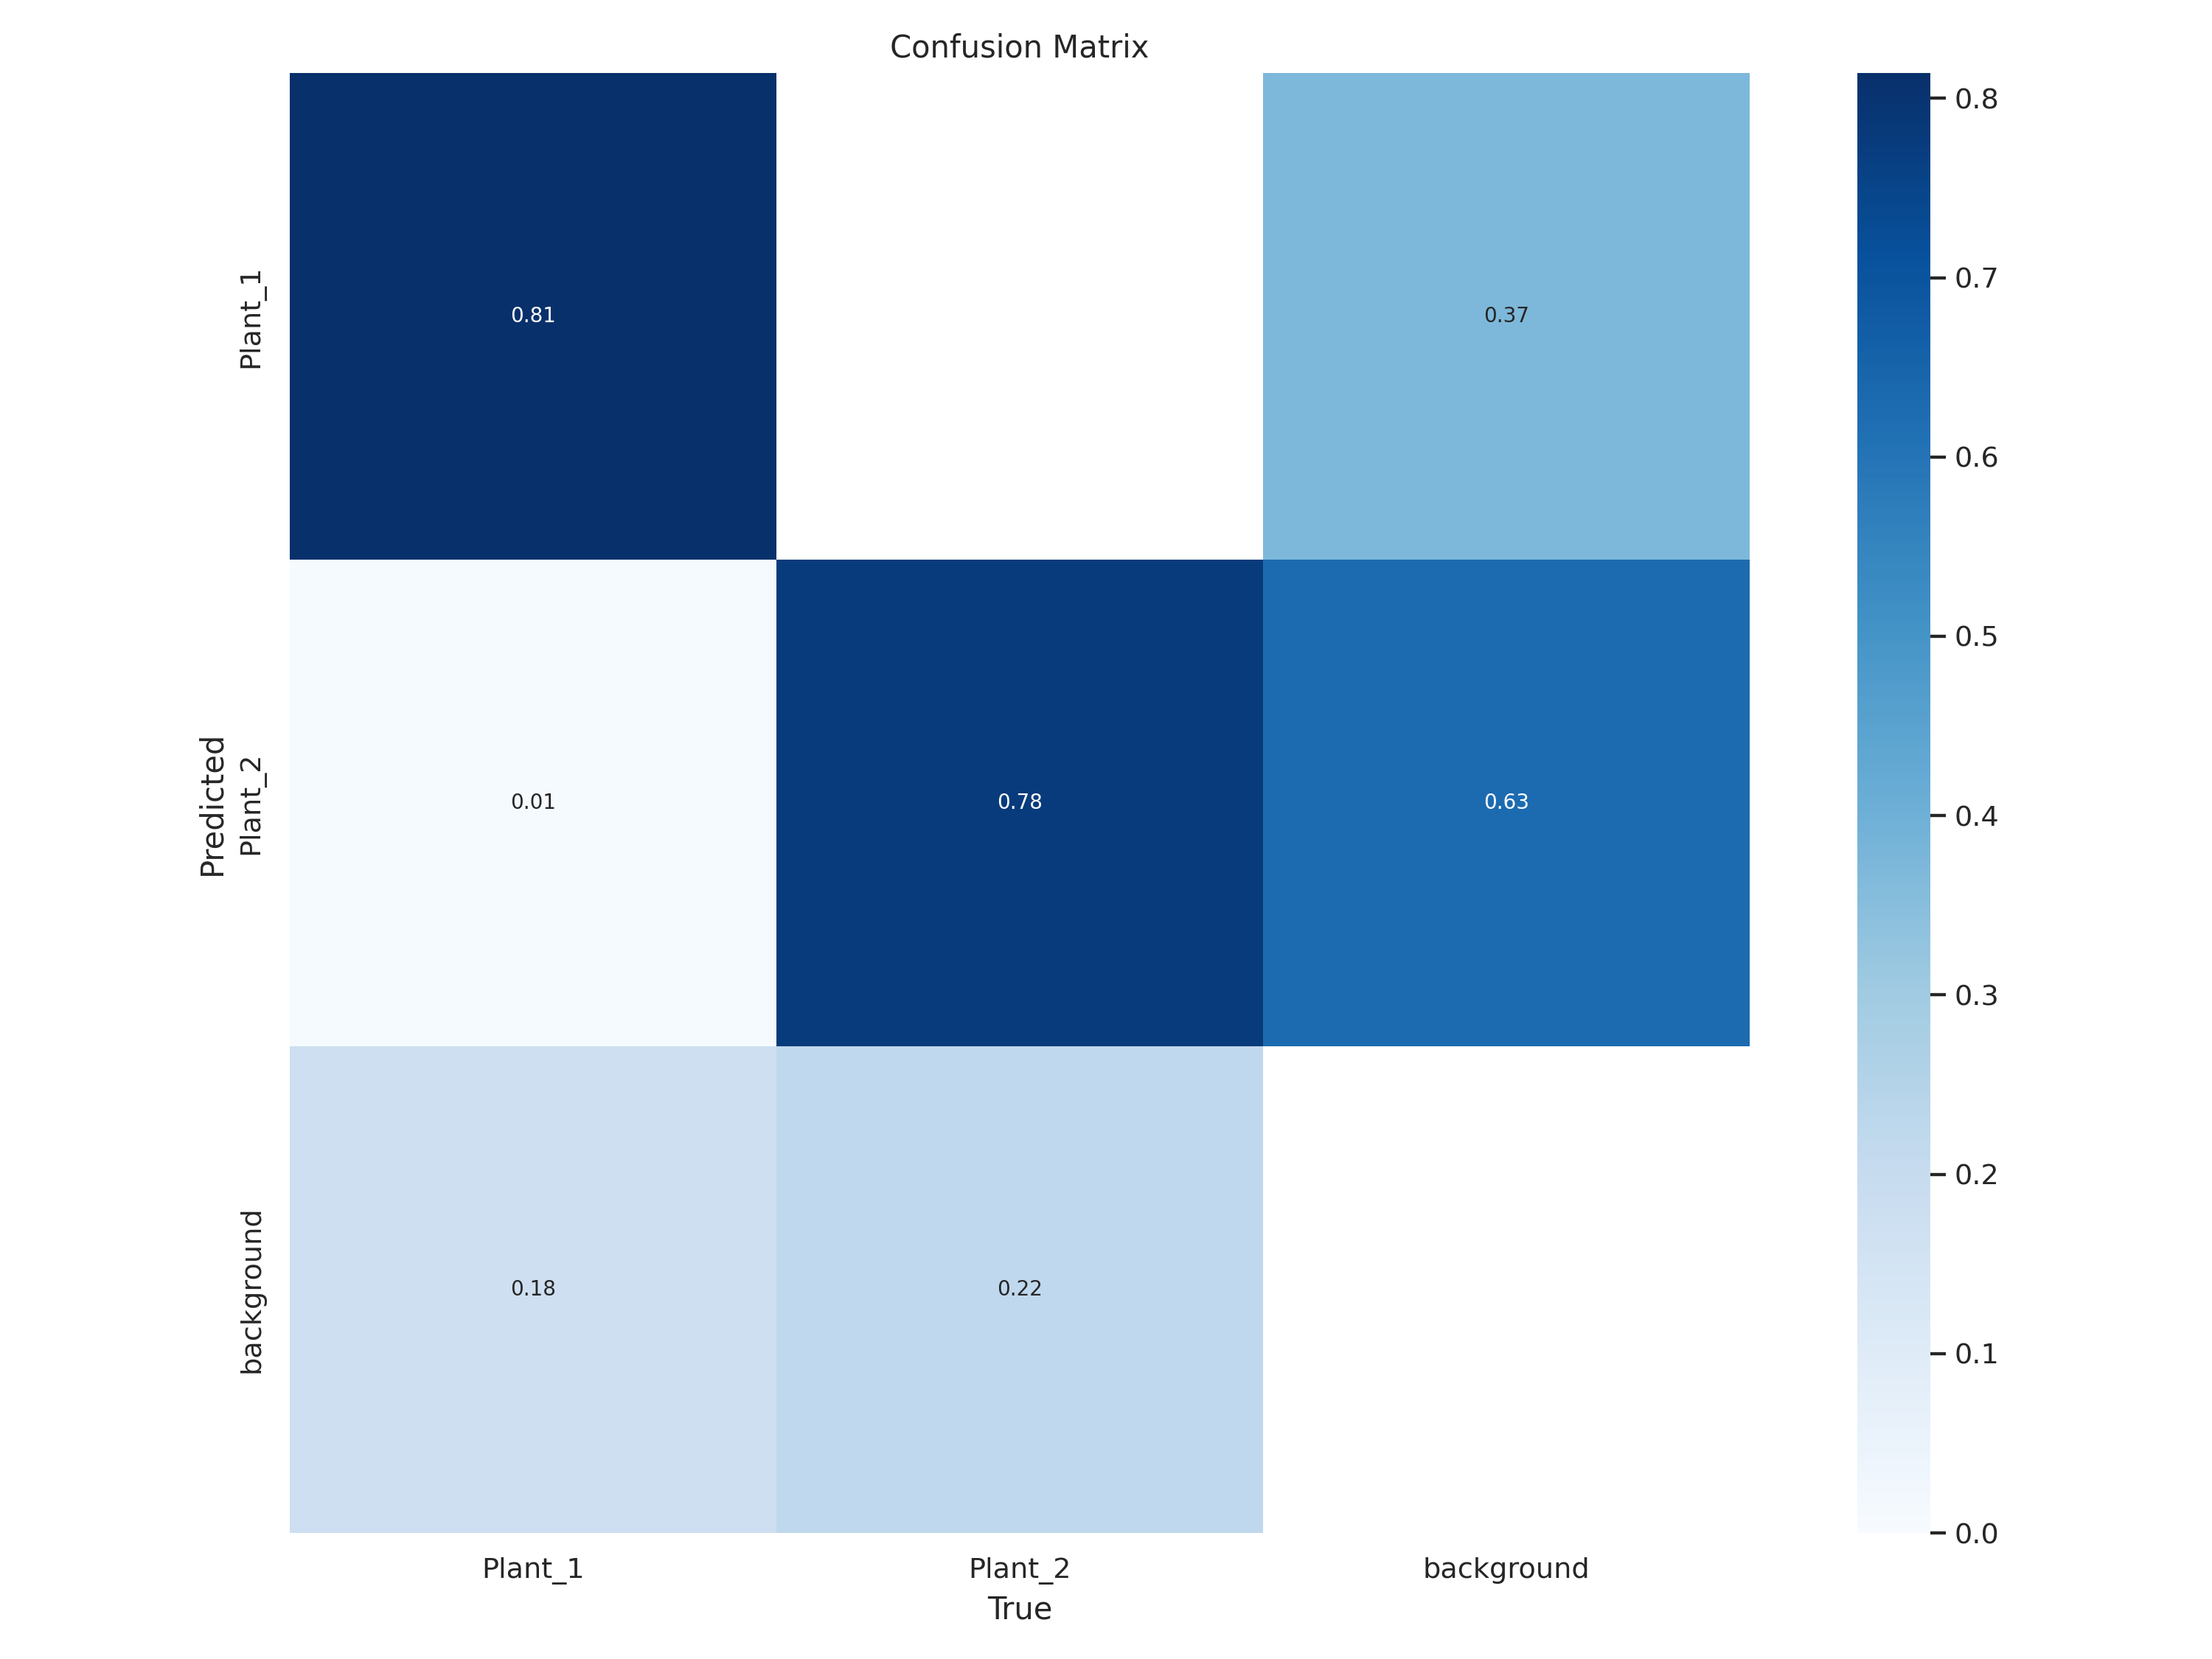

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


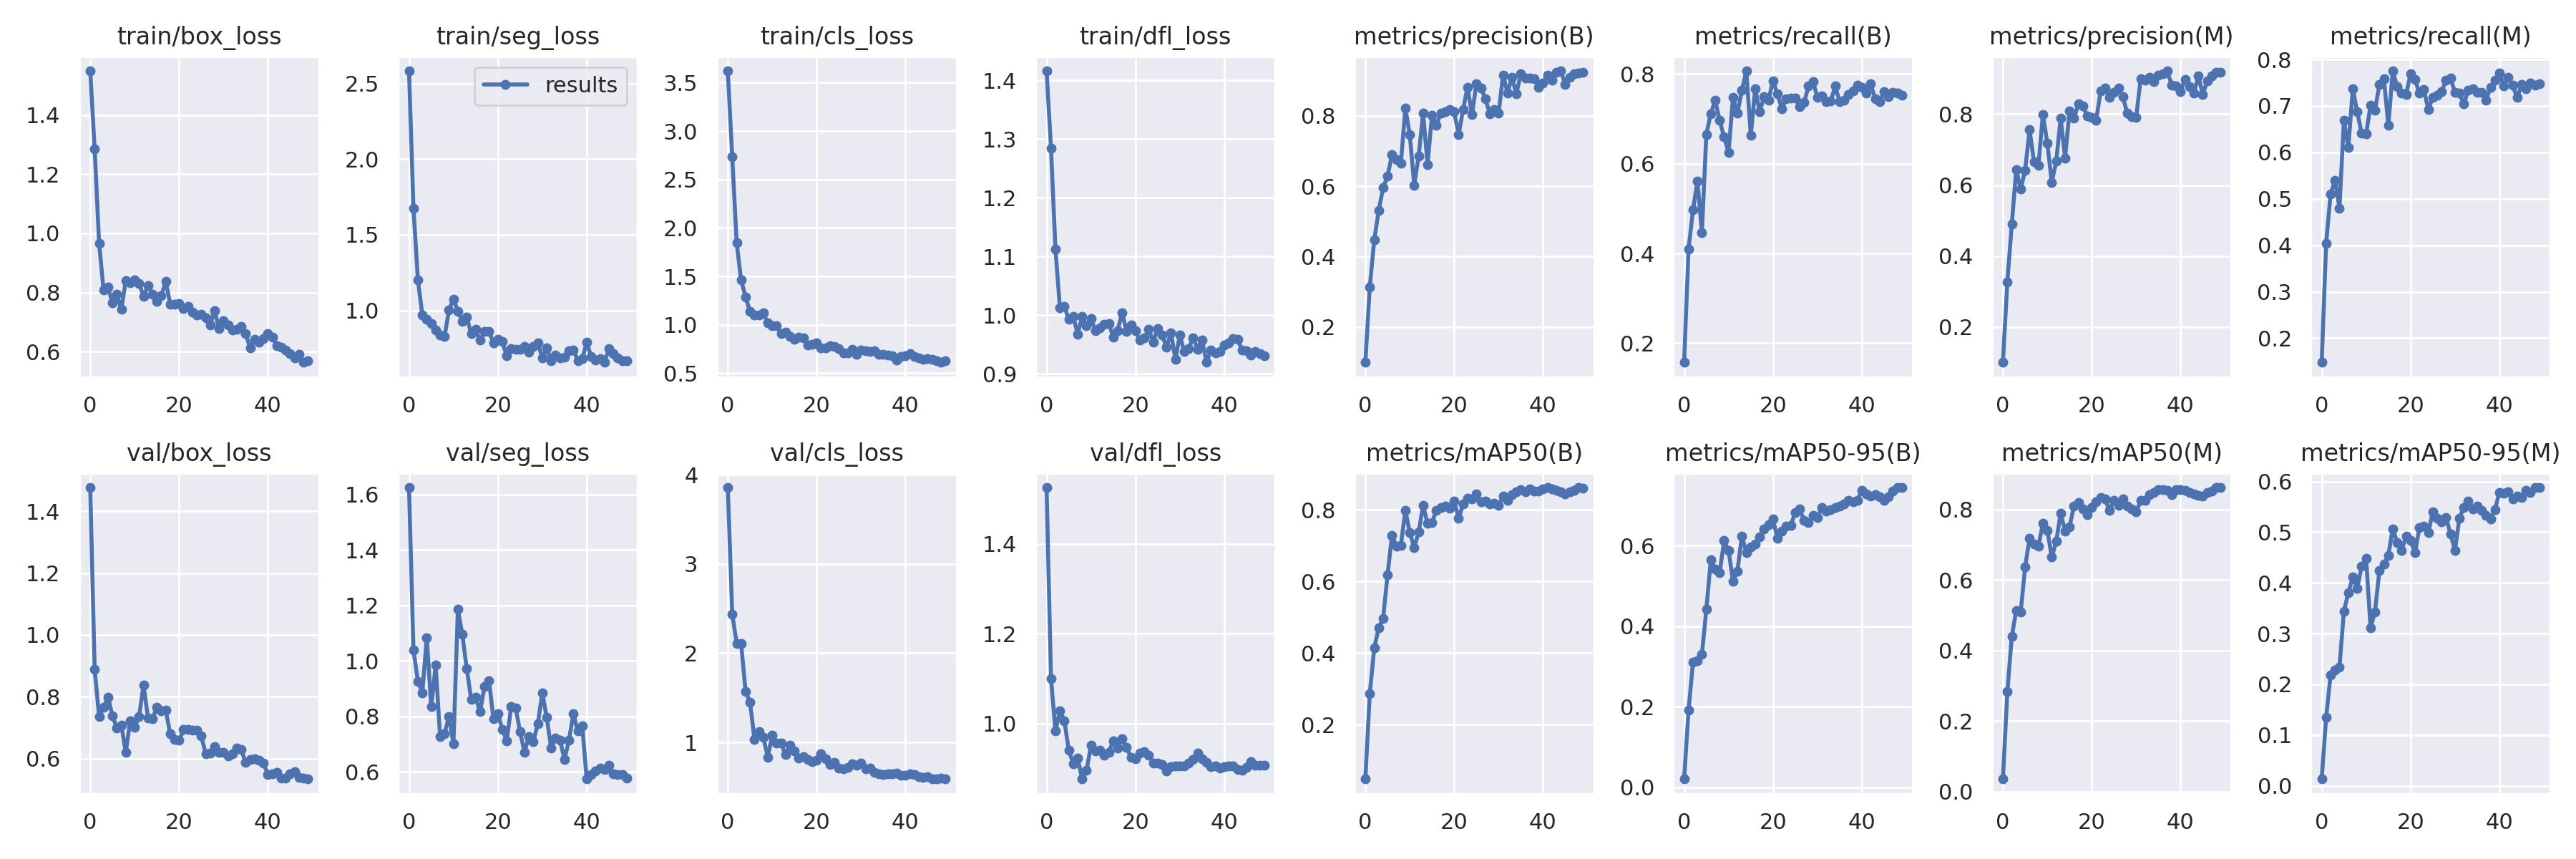

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


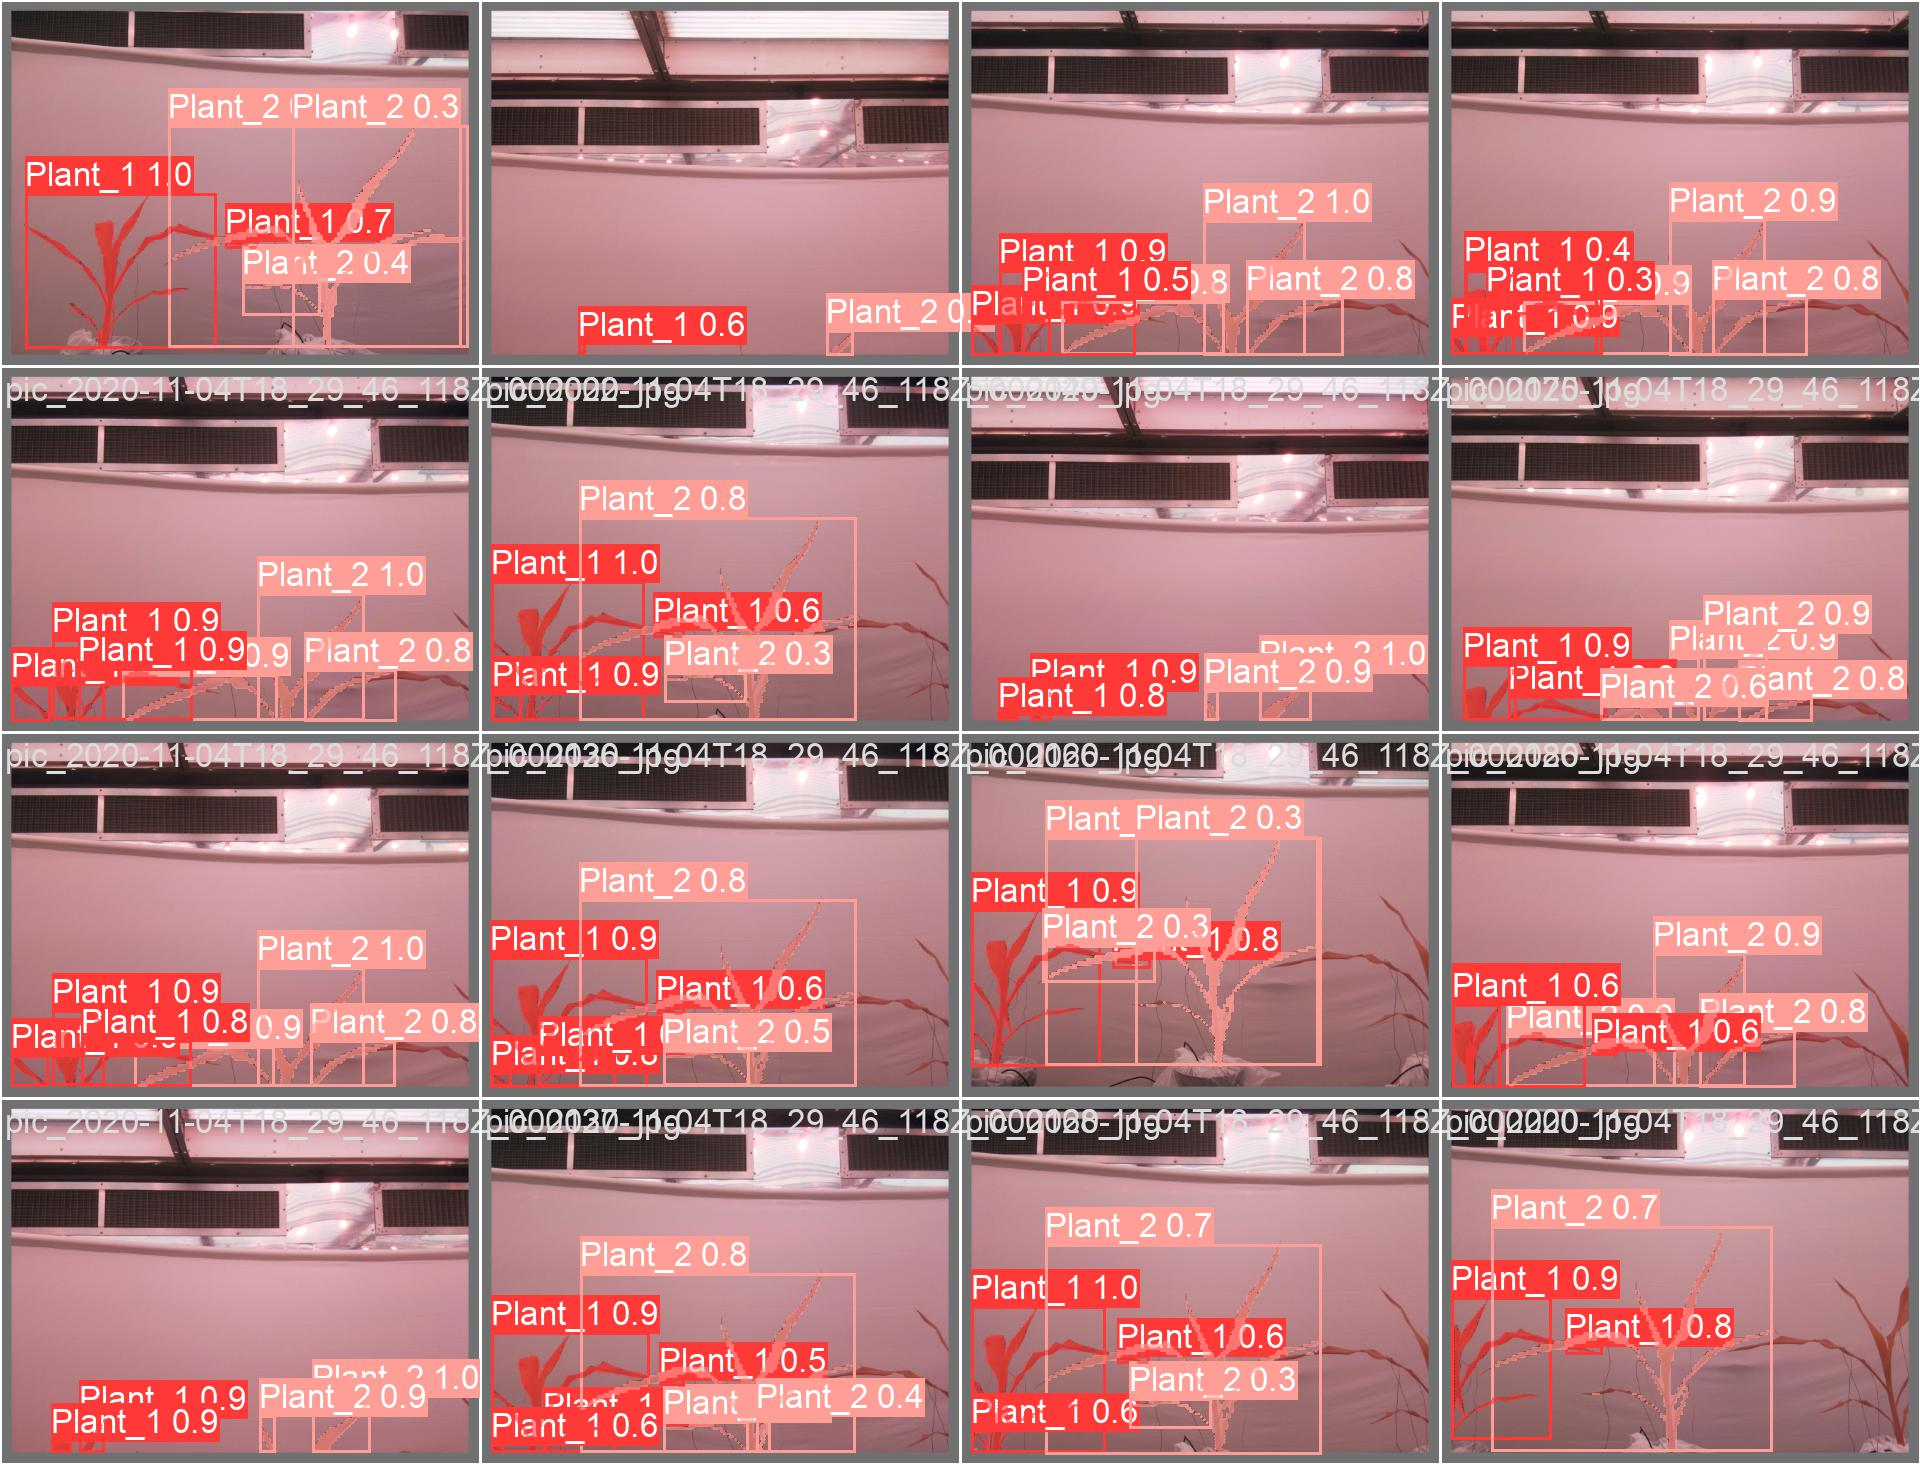

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-04-23 16:52:44.441940: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 16:52:45.405360: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/NN_Project_200423-2/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 3/3 [00:08<00:00,  2.82s/it]
                   all         38        217      0.922      0.758      0.8

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-04-22 22:03:38.063493: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 22:03:38.903824: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/23 /content/datasets/NN_Project_200423-2/test/images/pic_2020-11-04T18_29_46_118Z_000016_jpg.rf.72171e03b687144bb51187191990cd42.jpg: 512x640 5 Plant_2s, 72.6ms
image 2/23 /content/datasets/NN_Project_200423-2/test/images/pic_2020-11-04T18_29_46_118Z_000020_jpg.rf.1604db41de64d83e0d7eaf44391aaad6.jpg: 512x640 2 Plant_1s, 5 Plant_2s, 17.0ms
image 3/23 /content/datasets/NN

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:23]:
      display(Image(filename=image_path, height=600))
      print("\n")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source=/content/runs/segment/predict/pic_2020-11-04T18_29_46_118Z_000084_jpg.rf.db09d4ded2bca2e133adeeccc74e0732.jpg save=true save_txt=true

/content
2023-04-22 22:43:48.872647: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-22 22:43:49.712487: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/runs/segment/predict/pic_2020-11-04T18_29_46_118Z_000084_jpg.rf.db09d4ded2bca2e133adeeccc74e0732.jpg: 512x640 1 Plant_1, 2 Plant_2s, 75.7ms
Speed: 0.7ms pre-process, 75.7ms inference, 95.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict4
1 label saved to runs/segment/predict4/labels


In [ ]:
model = YOLO(f'{HOME}/runs/segment/train/weights/best.pt')
results = model.predict(source='/content/runs/segment/predict/pic_2020-11-04T18_29_46_118Z_000084_jpg.rf.db09d4ded2bca2e133adeeccc74e0732.jpg', conf=0.25)

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/runs/segment/predict/pic_2020-11-04T18_29_46_118Z_000084_jpg.rf.db09d4ded2bca2e133adeeccc74e0732.jpg: 512x640 1 Plant_1, 2 Plant_2s, 77.4ms
Speed: 0.7ms pre-process, 77.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results[0].boxes.xyxy

tensor([[8.92000e+02, 9.33000e+02, 2.83800e+03, 2.46400e+03],
        [1.00000e+00, 1.39400e+03, 1.22500e+03, 2.45900e+03],
        [1.51200e+03, 9.33000e+02, 2.78800e+03, 2.46400e+03]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.70741, 0.58664, 0.27863], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([1., 0., 1.], device='cuda:0')

In [ ]:
results[0].masks.masks

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')

In [ ]:
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow

In [ ]:
cv_imshow((results[0].masks,masks.numpy() * 255).astype("unit8"))

NameError: ignored

In [ ]:
results[0].masks.masks.shape

torch.Size([3, 512, 640])

In [ ]:
results[0].masks.masks[0]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [ ]:
results[0].masks.masks[0].shape

torch.Size([512, 640])

In [ ]:
results[0].masks.masks[0].unique()

tensor([0., 1.], device='cuda:0')

In [ ]:
cv2_imshow((results[0].masks.masks[0].numpy() * 255).astype("unit8"))

TypeError: ignored

In [ ]:
masks = results[0].masks.masks[0]
masks_np = (masks.cpu().numpy() * 255).astype('uint8')

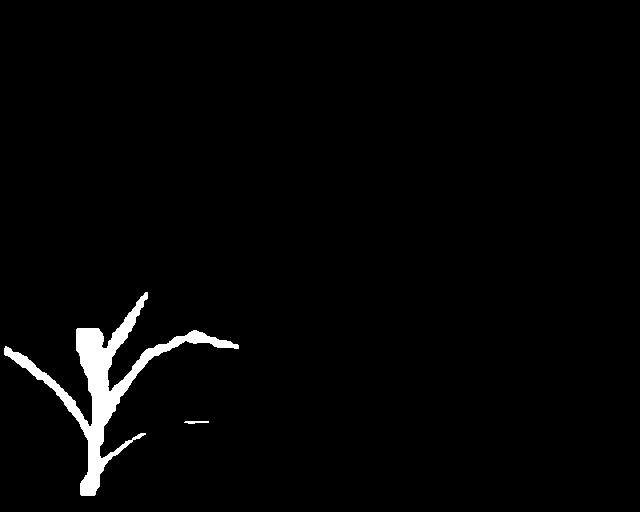

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

# Assuming 'results' is a list of object detection results
masks = results[0].masks.masks[1]
masks_np = (masks.cpu().numpy() * 255).astype('uint8')

# Display the mask using cv2_imshow()
cv2_imshow(masks_np)


In [ ]:
masks = results[0].masks.masks[0].cpu().numpy()
image = cv2.imread('/content/datasets/NN_Project_200423-2/test/images/pic_2020-11-04T18_29_46_118Z_000084_jpg.rf.db09d4ded2bca2e133adeeccc74e0732.jpg')  # Replace with your image file path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
background = np.ones_like(image) * 255

In [ ]:
overlay = np.zeros_like(image)
overlay[masks[:, :, 0] > 0.5] = image[masks[:, :, 0] > 0.5]
alpha = 0.5  # Adjust the alpha value as needed
output = cv2.addWeighted(overlay, alpha, background, 1 - alpha, 0)

IndexError: ignored